# Advanced Regression
- A US based company is trying to enter Australian real estate market and wants to buy houses at lower prices and sell it with a profit margin

## Problem Statement
 - To model the price of houses with the available independent variables and identify variables significant in predicting the price of a house and how well those variables describe the price of a house

## Target Variable
- Here our target variable will be the price of the house, which is SalePrice

## Solution Approach

### 1. Data understanding & EDA
### 2. Data Preparation & Modelling 

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


#Modelling Specific Libraries


from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.model_selection import  cross_val_score,  train_test_split

from sklearn.preprocessing import RobustScaler,  OrdinalEncoder

from sklearn.feature_selection import RFECV, RFE

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p


##  Data understanding & EDA
### Understanding the Data Dictionary

In [2]:
# Reading the data from csv file
df = pd.read_csv('train.csv',low_memory=False)
#Reading first 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- From the above, we see there are 81 columns.
- Many numeric columns are categories represented in numeric form
- Year columns can be converted to age
- Alley,FireplaceQu, PoolQC, Fence and MiscFeature have high missing values

In [4]:
#Dropping the ID column
df.drop('Id', axis = 1, inplace = True)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [6]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [7]:
df_corr = df[df.columns[1:]].corr()['SalePrice'][:]

In [8]:
df_corr.sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

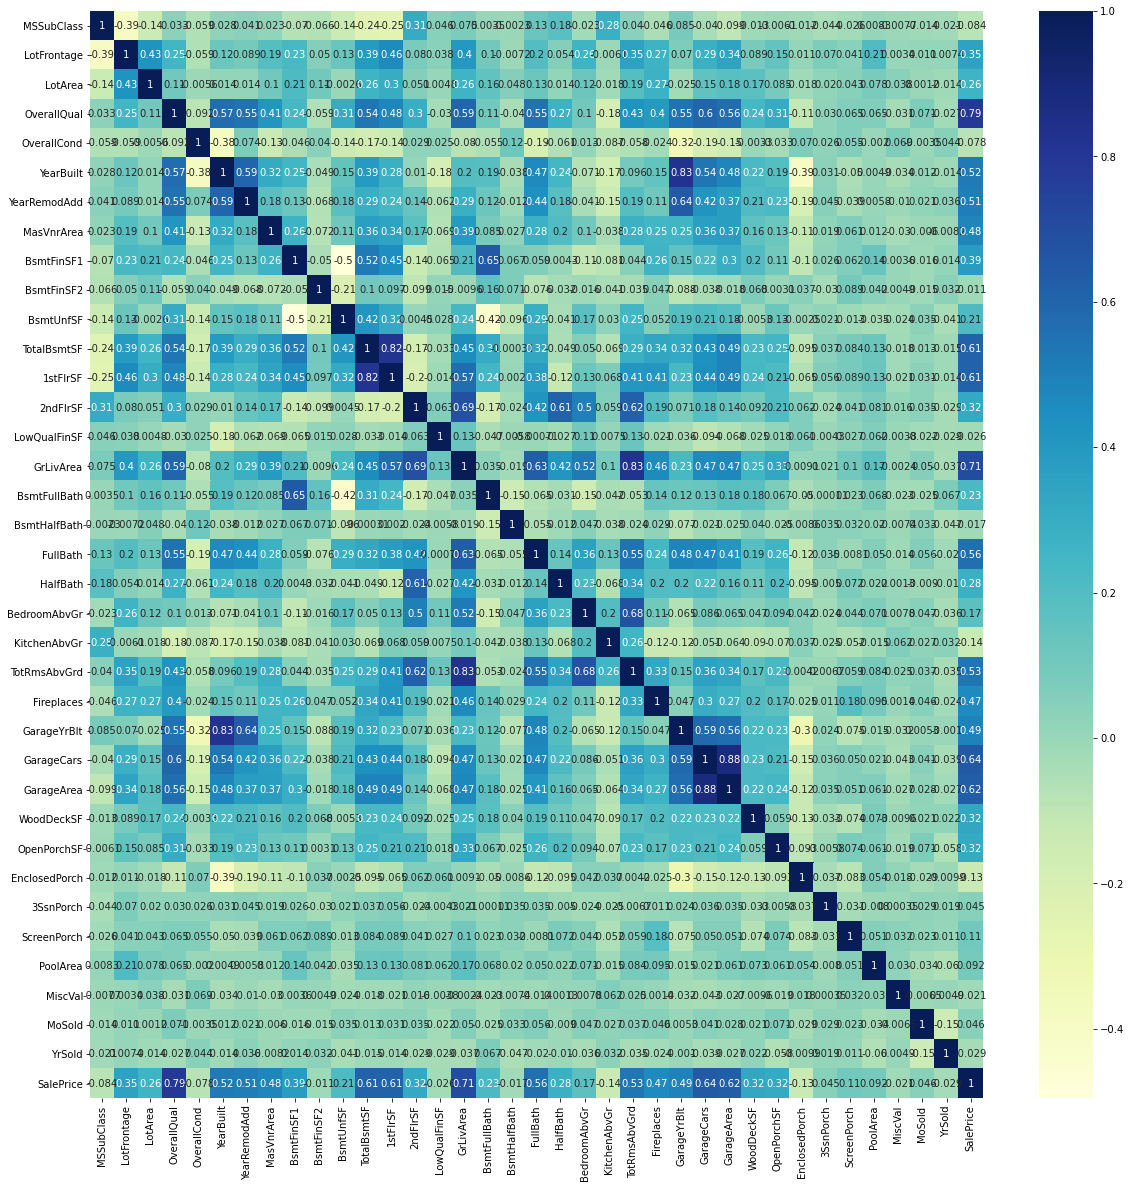

In [9]:
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

- The numeric variables GrLivArea,GarageCars,GarageArea, FullBathTotalBsmtSF, 1stFlrSF, MasVnrArea, BsmtFinSF1,OpenPorchSF, LotArea show positive correlation
- There are few mulitcolinearity among the variables

## Univariate Analysis

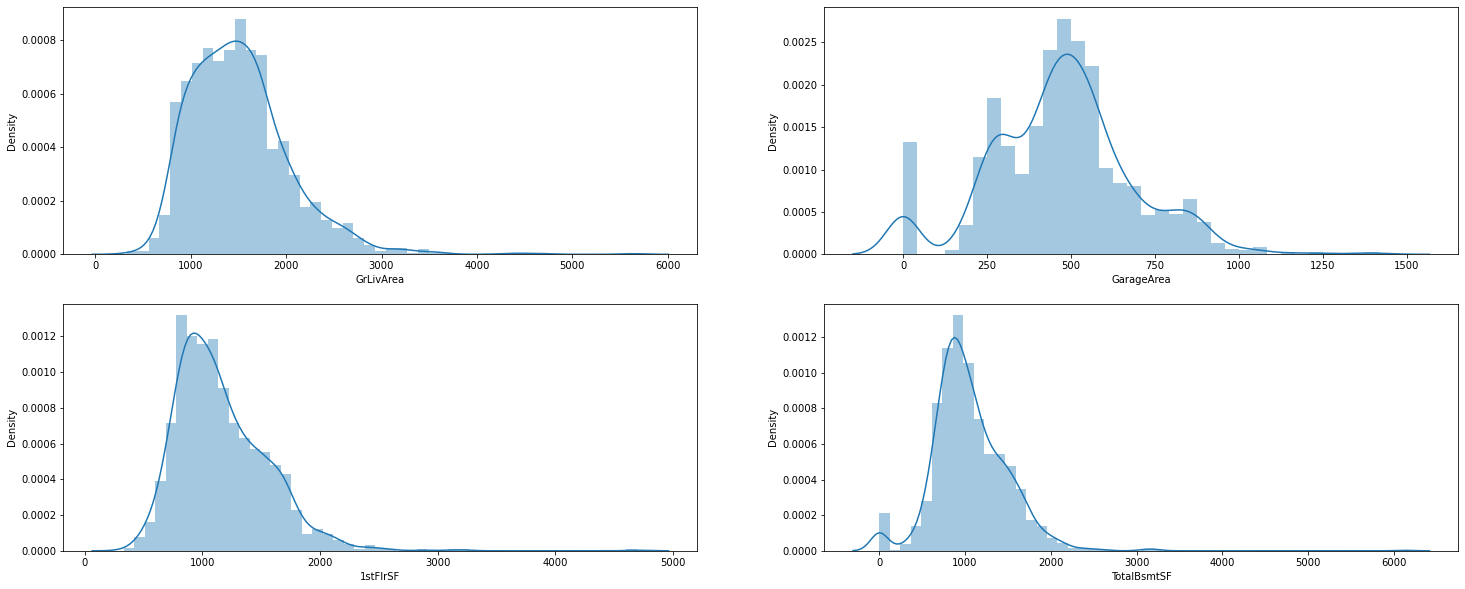

In [10]:
# Lets check on few highly corelated numeric variables
fig = plt.figure(figsize=(25, 10))
gr_liv = fig.add_subplot(221)
sns.distplot(df.GrLivArea)
gar_ar = fig.add_subplot(222)
sns.distplot(df.GarageArea)
first_flr = fig.add_subplot(223)
sns.distplot(df['1stFlrSF'])
tot_bsm = fig.add_subplot(224)
sns.distplot(df.TotalBsmtSF)
plt.show()

From the analysis so far, there are few outliers especially with Total Basement SF and 1stflr

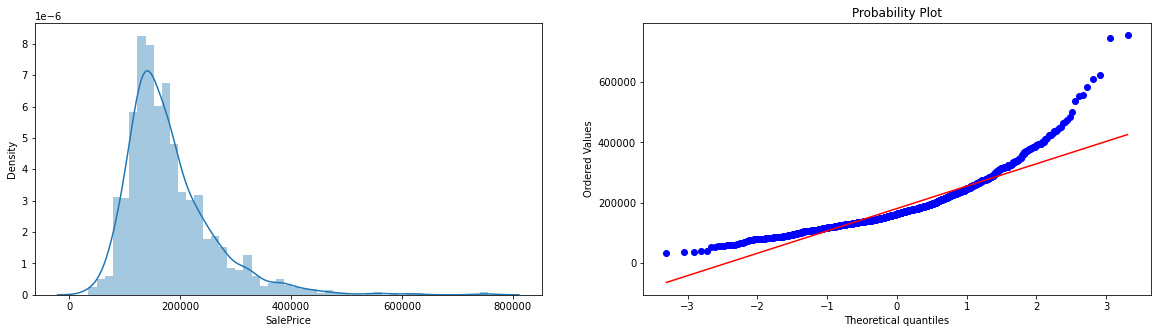

In [11]:
#Analysing the Dependent Variable SalePrice
fig = plt.figure(figsize = (20,5))
#Kernel Density Plot
kde = fig.add_subplot(121)
sns.distplot(df.SalePrice)
#Q-Q Plot
fig2 = fig.add_subplot(122)
pp = probplot(df.SalePrice, plot = fig2)
plt.show()

- It is evident that the SalePrice has a long tail and we might have to perform some transformation to get it to normal distribution

## Bivariate Analysis

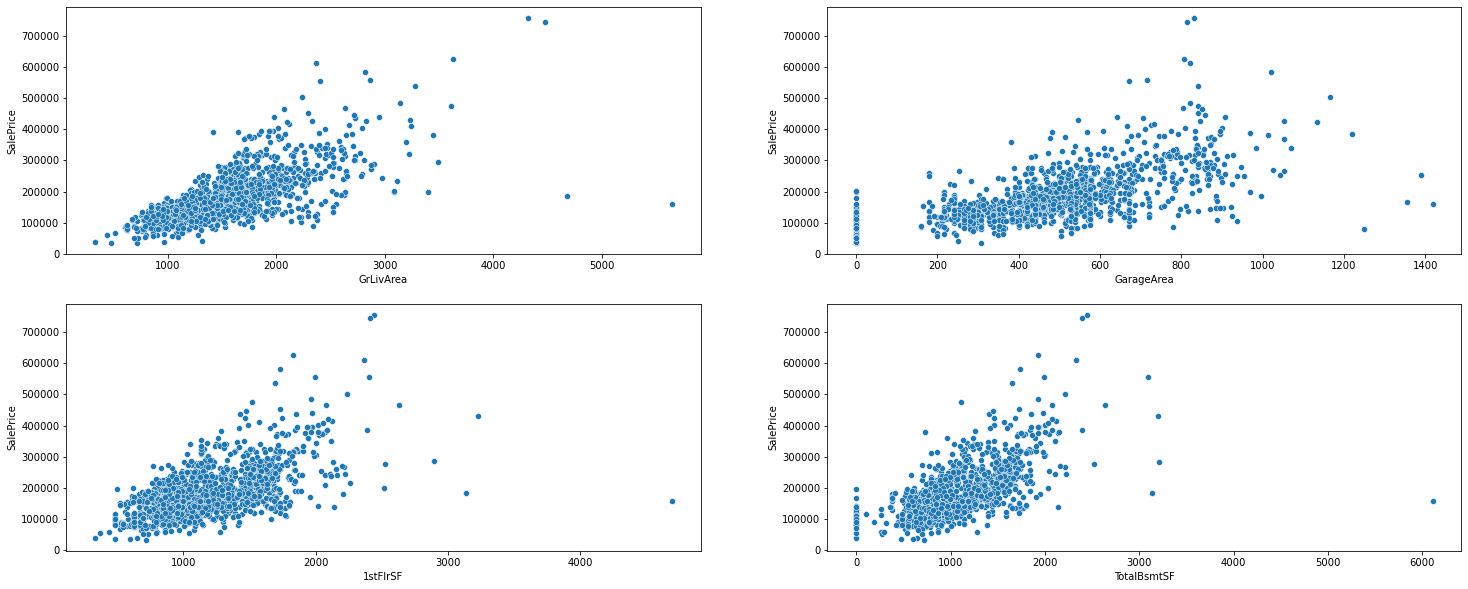

In [12]:
fig = plt.figure(figsize=(25, 10))
gr_liv = fig.add_subplot(221)
sns.scatterplot(y = df.SalePrice, x = df.GrLivArea)
gar_ar = fig.add_subplot(222)
sns.scatterplot(y = df.SalePrice, x = df.GarageArea)
first_flr = fig.add_subplot(223)
sns.scatterplot(y = df.SalePrice, x = df['1stFlrSF'])
tot_bsm = fig.add_subplot(224)
sns.scatterplot(y = df.SalePrice , x = df.TotalBsmtSF)
plt.show()


From the above we see a linear relationship between the highly correlated independednt variables with that of the dependent variable

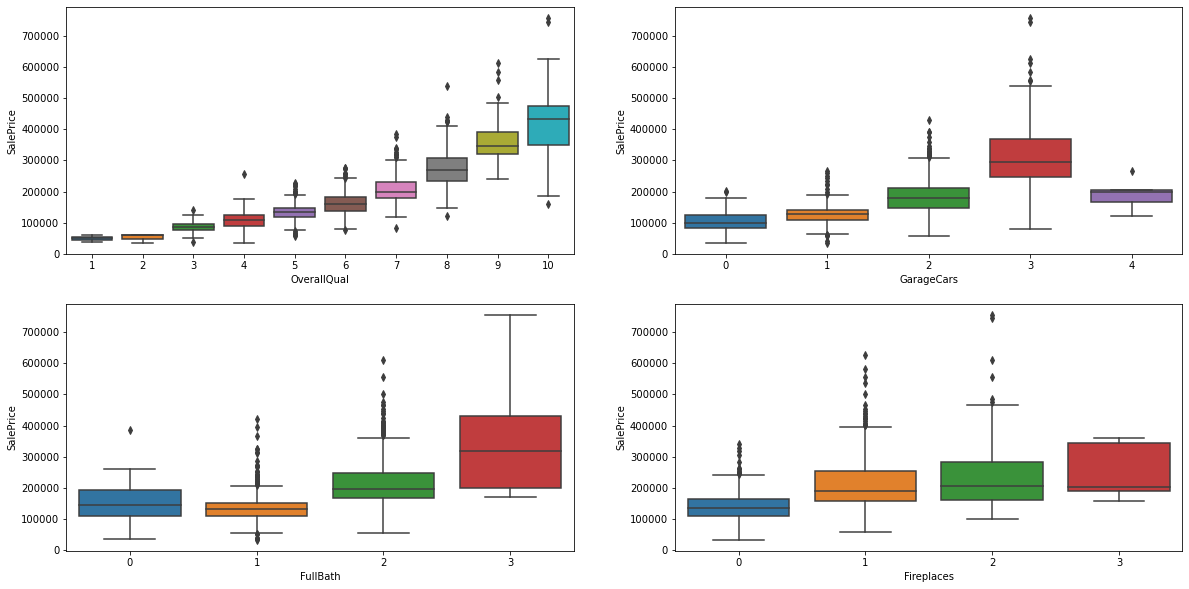

In [13]:
#Analysing few categorical variables with high correlation with Sale Price

fig = plt.figure(figsize=(20, 10))

ov_ql = fig.add_subplot(221)
sns.boxplot(x='OverallQual', y='SalePrice', data=df[['SalePrice', 'OverallQual']])

gar_car = fig.add_subplot(222)
sns.boxplot(x='GarageCars', y='SalePrice', data=df[['SalePrice', 'GarageCars']])

F_b = fig.add_subplot(223)
sns.boxplot(x='FullBath', y='SalePrice', data=df[['SalePrice', 'FullBath']])

F_p = fig.add_subplot(224)
sns.boxplot(x='Fireplaces', y='SalePrice', data=df[['SalePrice', 'Fireplaces']]) 
plt.show()


- The above all categories very much influence high sale price

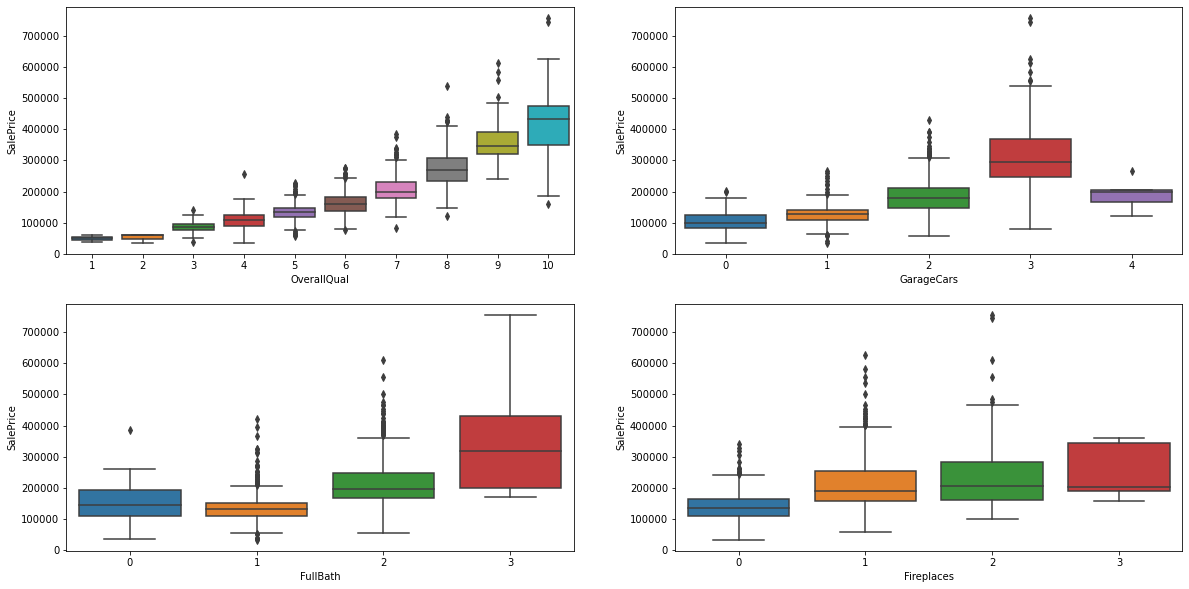

In [14]:
fig = plt.figure(figsize=(20, 10))

ov_ql = fig.add_subplot(221)
sns.boxplot(x='OverallQual', y='SalePrice', data=df[['SalePrice', 'OverallQual']])

gar_car = fig.add_subplot(222)
sns.boxplot(x='GarageCars', y='SalePrice', data=df[['SalePrice', 'GarageCars']])

F_b = fig.add_subplot(223)
sns.boxplot(x='FullBath', y='SalePrice', data=df[['SalePrice', 'FullBath']])

F_p = fig.add_subplot(224)
sns.boxplot(x='Fireplaces', y='SalePrice', data=df[['SalePrice', 'Fireplaces']]) 
plt.show()

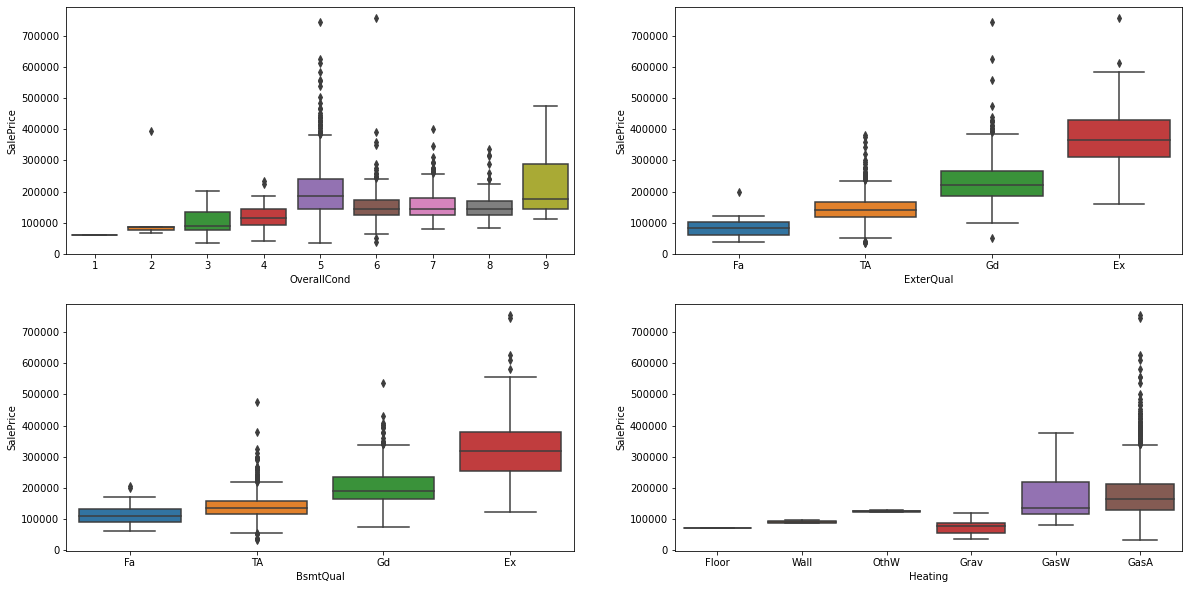

In [15]:
fig = plt.figure(figsize=(20, 10))

ov_cl = fig.add_subplot(221)
sns.boxplot(x='OverallCond', y='SalePrice', data=df[['SalePrice', 'OverallCond']])

ext_qu = fig.add_subplot(222)
sns.boxplot(x='ExterQual', y='SalePrice', data=df[['SalePrice', 'ExterQual']],order = ['Fa','TA','Gd','Ex'])

bs_qu = fig.add_subplot(223)
sns.boxplot(x='BsmtQual', y='SalePrice', data=df[['SalePrice', 'BsmtQual']],order = ['Fa','TA','Gd','Ex'])

ht = fig.add_subplot(224)
sns.boxplot(x='Heating', y='SalePrice', data=df[['SalePrice', 'Heating']],order = ['Floor','Wall','OthW','Grav','GasW','GasA'])
plt.show()
           

- The better the quality of basement(BsmtQual) and exterior material(Exter Qual), the costlier the houses are

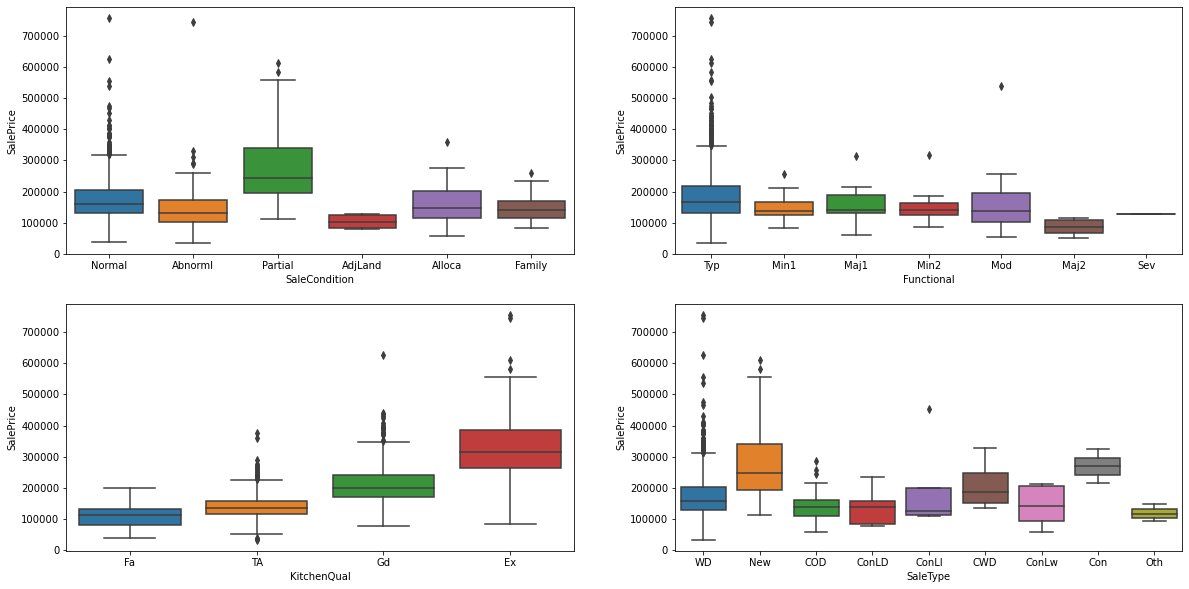

In [16]:
fig = plt.figure(figsize=(20, 10))

sl_cn = fig.add_subplot(221)
sns.boxplot(x='SaleCondition', y='SalePrice', data=df[['SalePrice', 'SaleCondition']])


func = fig.add_subplot(222)
sns.boxplot(x='Functional', y='SalePrice', data=df[['SalePrice', 'Functional']])

kt_qu = fig.add_subplot(223)
sns.boxplot(x='KitchenQual', y='SalePrice', data=df[['SalePrice', 'KitchenQual']],\
           order = ['Fa','TA','Gd','Ex'])

sa_ty = fig.add_subplot(224)
sns.boxplot(x='SaleType', y='SalePrice', data=df[['SalePrice', 'SaleType']])

plt.show()

- The sale condition and house functionality has minimal impact on Sale Price but kitchen quality has a positive influence
- Sale Type New has a higher sale price compare to others

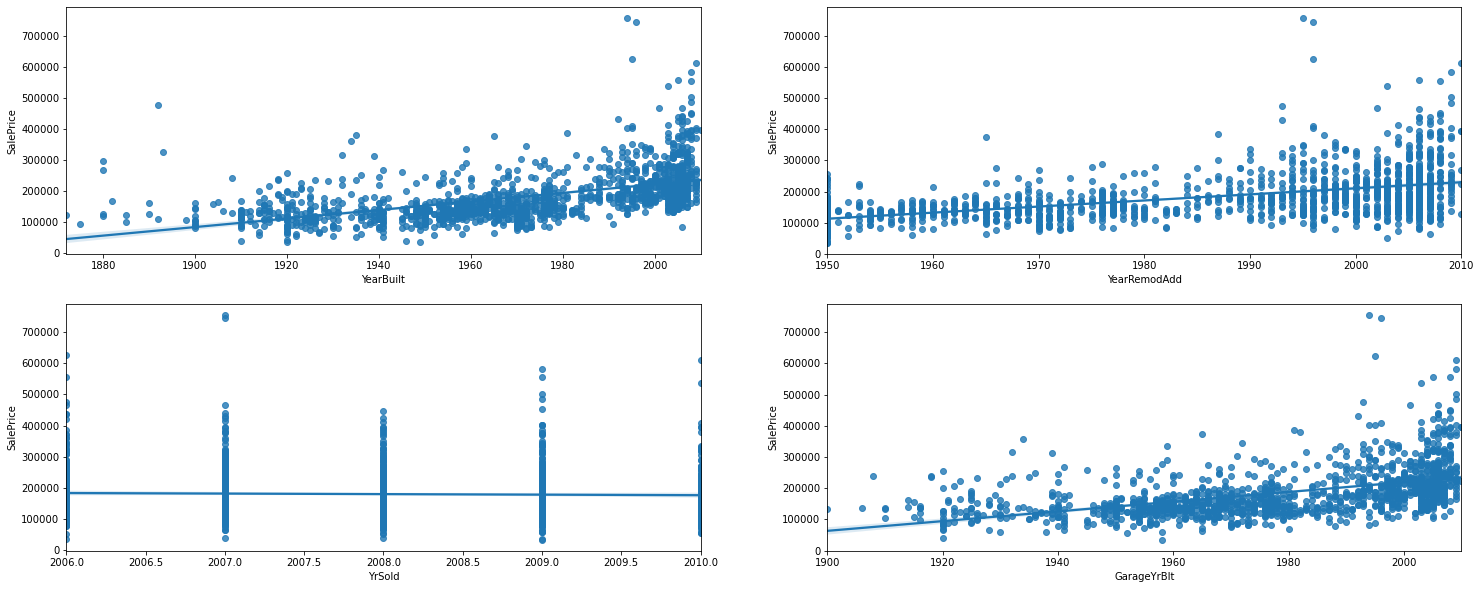

In [17]:
# Lets analyse some year based categories
fig,ax = plt.subplots(2,2, figsize=(25, 10))

sns.regplot(x = 'YearBuilt', y = 'SalePrice',data = df,ax=ax[0,0])

sns.regplot(x = 'YearRemodAdd', y = 'SalePrice',data = df,ax=ax[0,1])

sns.regplot(x = 'YrSold', y = 'SalePrice',data = df,ax=ax[1,0])

sns.regplot(x = 'GarageYrBlt', y = 'SalePrice',data = df,ax=ax[1,1])

plt.show()


 - It is evident that sales price increases with every year for Year built and Garage Year built

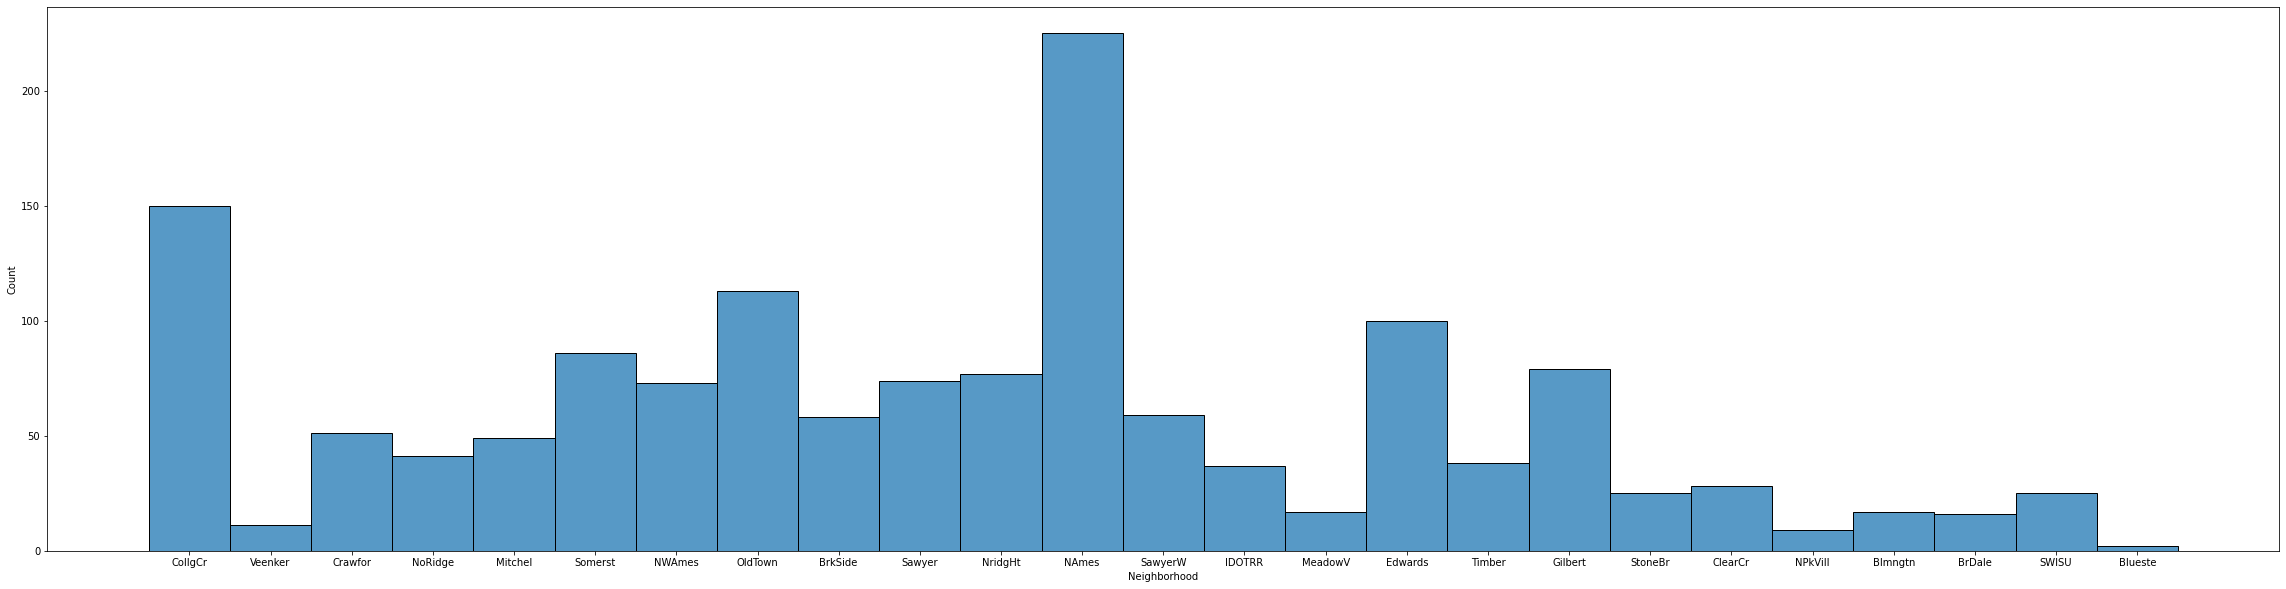

In [18]:
# Analysing Neighborhood
fig = plt.figure(figsize=(40, 10))
sns.histplot(df.Neighborhood)
plt.show()

- Neighborhoods NAmes and CollgCr have high demand for house

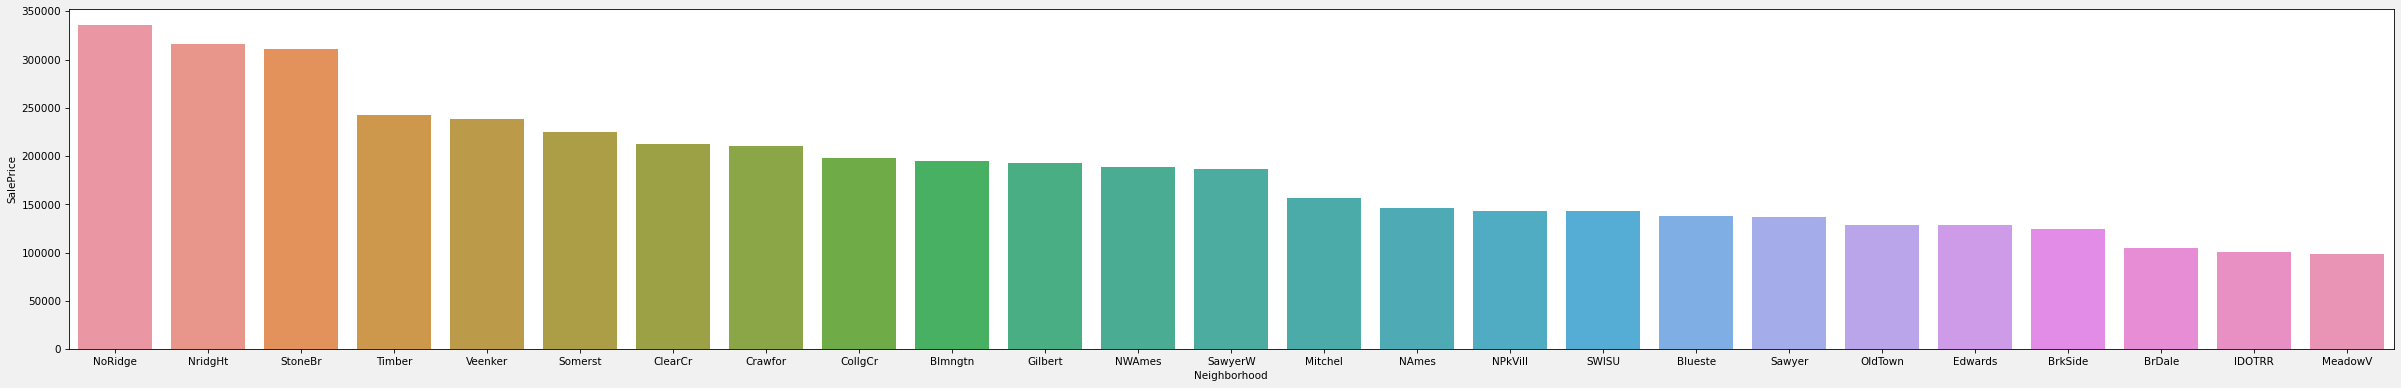

In [19]:
f, (ax1) = plt.subplots(dpi = 75, figsize = (40,6), facecolor='#f1f1f1', edgecolor='g')
sns.barplot(ax=ax1, data = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = False).reset_index(),\
            x = 'Neighborhood',y='SalePrice')
plt.show()

- Even though Neighbourhoods like Northridge, Northridge Heights and Stone Brook has sold low number of houses, the value of those houses are high

### Missing Value Imputation

In [20]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing',ascending = False)

,percent_missing
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945


In [21]:
#Creating a copy of original data before editing the contents
df_v1 = df.copy()

#From the above missing %, we will drop the coloumns having more than 45% missing data.
df_v1.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis = 1, inplace = True)


In [22]:
#Analysing LotFrontage
df_v1.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

- Since the mean is closer to the median, we can impute it with mean value

In [23]:
#Analysing GarageYrBlt
df_v1[['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
...,...,...
1455,1999.0,1999
1456,1978.0,1978
1457,1941.0,1941
1458,1950.0,1950


In [24]:
#From the above, we can assume that, the garage was built in the same year as the house was built. Hence we can impute the
#missing value of garage built year with respective house built year
df_v1['GarageYrBlt'] = df_v1['GarageYrBlt'].fillna(df_v1['YearBuilt'])

In [25]:
# Analysing other Garage related variables

gar = ['GarageCond','GarageType', 'GarageFinish', 'GarageQual']

# From the data dictionary, we understand that the value 'NA' represents 'No Garage' and actually not missing data. Hence
# we can replace the 'NA' to 'NO'

In [26]:
# Analysing the Basement related variables
bsmt = ['BsmtExposure','BsmtCond','BsmtQual', 'BsmtFinType1', 'BsmtFinType2']

# From the data dictionary, we understand that the value 'NA' represents 'No Basement' and actually not missing data. Hence
# we can replace the 'NA' to 'NO'

In [27]:
# Analysing MasVnrArea
df_v1.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

- Considering fact that the missing percentage is less than 1 and its a numeric variable, we can impute it using mean

In [28]:
# Analysing MasVnrType
df_v1.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

- Considering fact that the missing percentage is less than 1 and its a categorical variable, we can impute it using mode

In [29]:
# Analysing Electrical
df_v1.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

- Considering fact that the missing percentage is less than 1 and its a categorical variable, we can impute it using mode

#### Using SimpleImputer from sklearn to impute values

In [30]:
mean_si = SimpleImputer(missing_values= np.NaN, strategy = 'mean')
mode_si = SimpleImputer(strategy = 'most_frequent')
cons_si = SimpleImputer(strategy = 'constant', fill_value = 'NO')

In [31]:
mean_col = ['LotFrontage','MasVnrArea']
mode_col = ['MasVnrType','Electrical']

In [32]:
df_v1[mean_col] = mean_si.fit_transform(df_v1[mean_col])
df_v1[gar]   = cons_si.fit_transform(df_v1[gar])
df_v1[bsmt]  = cons_si.fit_transform(df_v1[bsmt])
df_v1[mode_col]   = mode_si.fit_transform(df_v1[mode_col])

### Encoding the Catergorical Variables

From data dictionary. we understand that features MoSold and MSSubClass are categories with numerical value. We will convert them to categorical features

In [33]:
df_v1 = df_v1.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

df_v1 = df_v1.replace({"MSSubClass" : {20 : "MSC20", 30 : "MSC30", 40 : "MSC40", 45 : "MSC45",50 : "MSC50", 60 : "MSC60", 70 : "MSC70", 75 : "MSC75", 
                                       80 : "MSC80", 85 : "MSC85", 90 : "MSC90", 120 : "MSC120",150 : "MSC150", 
                                       160 : "MSC160", 180 : "MSC180", 190 : "MSC190"}})

In [34]:
# or year related variables, we can create a new variable age for both house and garage. We will als create another 
# variable to identify if the houses are remodeled or new

year = ['YearBuilt','YrSold','YearRemodAdd','GarageYrBlt']
df_v1['HouseAge']  = df_v1['YrSold'] - df_v1['YearBuilt']
df_v1['GarageAge'] = df_v1['YrSold'] - df_v1['GarageYrBlt']

# Creating Remodelled House Flag

df_v1['Remodel'] = 0
df_v1.loc[(df_v1.YearBuilt != df_v1.YearRemodAdd),['Remodel']] = 1
df_v1.loc[(df_v1.YearBuilt == df_v1.YearRemodAdd),['Remodel']] = 2

In [35]:
#Droping the original year columns
df_v1.drop(year,axis = 1, inplace = True)

#### Encoding the ordered categorical variables

Features BsmtCond', 'BsmtExposure', 'BsmtQual', BsmtFinType1', 'BsmtFinType2', 'GarageCond', 'GarageQual', 'ExterCond', 'ExterQual', 'HeatingQC', 'KitchenQual','Utilities', 'Street', 'Functional', 'LandSlope', 'LotShape' and 'PavedDrive' have some kind of order in them. We will use OrdinalEncoder from sklearn

In [36]:
# Creating lists required to be used in OrdinalEncoder

# Creating columns list with same set of values
cols1 = ['BsmtCond','BsmtQual','GarageCond','GarageQual']
cols2 = ['ExterCond','ExterQual','HeatingQC','KitchenQual']
cols3 = ['BsmtFinType1','BsmtFinType2']

# Creating lists of different set of values 
strt  = [["Grvl","Pave"]]
drv   = [["N","P","Y"]]
slpQual   = [["Sev", "Mod", "Gtl"]]
qual1     = [["Po","Fa","TA","Gd","Ex"]]
qual2     = [["NO","Po","Fa","TA","Gd","Ex"]]
baseQual1 = [["NO","No","Mn","Av","Gd"]]
lotQual   = [["IR3", "IR2", "IR1", "Reg"]]
utilQual  = [["ELO", "NoSeWa", "NoSewr", "AllPub"]]
baseQual2  = [["NO", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]]
funQual   = [["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"]]

In [37]:
# Since we will have to use Ordinal encoder for multiple variables, creating a function for the same

def ordencoder(df,cats):
    ordenc = OrdinalEncoder(cats)
    df = ordenc.fit_transform(np.array(df).reshape(-1,1))
    return df

In [38]:
df_v1['Street']     = ordencoder(df_v1.Street,strt)
df_v1['PavedDrive'] = ordencoder(df_v1.PavedDrive,drv)
df_v1['LandSlope']  = ordencoder(df_v1.LandSlope,slpQual)
df_v1['LotShape']   = ordencoder(df_v1.LotShape,lotQual)
df_v1['Utilities']  = ordencoder(df_v1.Utilities,utilQual)
df_v1['BsmtExposure'] = ordencoder(df_v1.BsmtExposure,baseQual1)
df_v1['Functional'] = ordencoder(df_v1.Functional,funQual)

for col in cols1:
    df_v1[col] = ordencoder(df_v1[col],qual2)
    
for col in cols2:
    df_v1[col] = ordencoder(df_v1[col],qual1)
    
for col in cols3:
    df_v1[col] = ordencoder(df_v1[col],baseQual2)

In [39]:
df_v1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge,Remodel
0,MSC60,RL,65.0,8450,1.0,3.0,Lvl,3.0,Inside,2.0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3.0,2.0,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,4.0,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,3.0,8,7.0,0,Attchd,RFn,2,548,3.0,3.0,2.0,0,61,0,0,0,0,0,Feb,WD,Normal,208500,5,5.0,2
1,MSC20,RL,80.0,9600,1.0,3.0,Lvl,3.0,FR2,2.0,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,2.0,2.0,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,4.0,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2.0,6,7.0,1,Attchd,RFn,2,460,3.0,3.0,2.0,298,0,0,0,0,0,0,May,WD,Normal,181500,31,31.0,2
2,MSC60,RL,68.0,11250,1.0,2.0,Lvl,3.0,Inside,2.0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,3.0,2.0,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,4.0,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,3.0,6,7.0,1,Attchd,RFn,2,608,3.0,3.0,2.0,0,42,0,0,0,0,0,Sep,WD,Normal,223500,7,7.0,1
3,MSC70,RL,60.0,9550,1.0,2.0,Lvl,3.0,Corner,2.0,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2.0,2.0,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,3.0,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,3.0,7,7.0,1,Detchd,Unf,3,642,3.0,3.0,2.0,0,35,272,0,0,0,0,Feb,WD,Abnorml,140000,91,8.0,1
4,MSC60,RL,84.0,14260,1.0,2.0,Lvl,3.0,FR2,2.0,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,3.0,2.0,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,4.0,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,3.0,9,7.0,1,Attchd,RFn,3,836,3.0,3.0,2.0,192,84,0,0,0,0,0,Dec,WD,Normal,250000,8,8.0,2


In [40]:
# Transforming the Dependent Variable SalePrice to its log and also removing some outliers
df_v1 = df_v1.drop(df_v1[(df_v1.GrLivArea>4000) & (df_v1.SalePrice<300000)].index)

In [41]:
df_v1.SalePrice = np.log1p(df_v1.SalePrice)

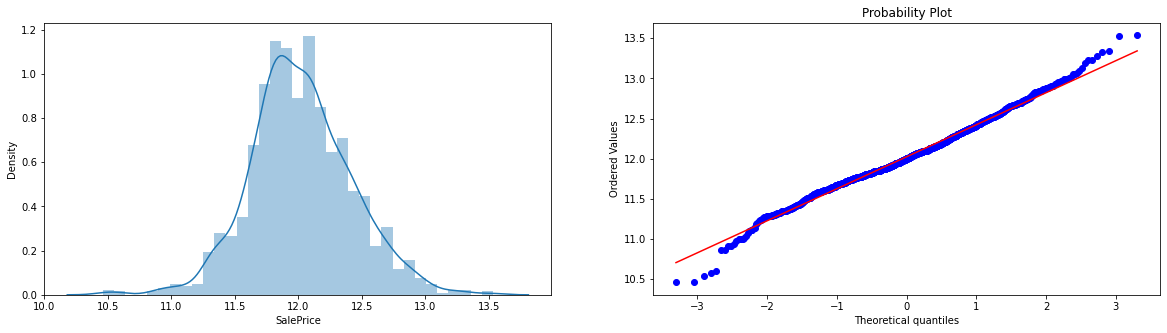

In [42]:
#Analysing the Dependent Variable SalePrice after Log Transform
fig = plt.figure(figsize = (20,5))
#Kernel Density Plot
kde = fig.add_subplot(121)
sns.distplot(df_v1.SalePrice)
#Q-Q Plot
fig2 = fig.add_subplot(122)
pp = probplot(df_v1.SalePrice, plot = fig2)
plt.show()

Now we can see a better normal distribution with less skew

#### Outlier Treatment for Numeric Variables
- Lets identify the skewness of numeric variables
- Treat skewness greater than 0.7 for variables having greater than 0.3 correlation coefficient with SalesPrice

In [43]:
data1 = df_v1.skew()

In [44]:
data1.sort_values(ascending=False)

MiscVal          24.460085
PoolArea         15.948945
LotArea          12.573925
3SsnPorch        10.297106
LowQualFinSF      9.004955
KitchenAbvGr      4.484883
BsmtFinSF2        4.251925
ScreenPorch       4.118929
BsmtHalfBath      4.100114
BsmtFinType2      3.294151
EnclosedPorch     3.087164
MasVnrArea        2.695087
OpenPorchSF       2.339829
LotFrontage       1.694720
WoodDeckSF        1.545805
ExterCond         1.395464
BsmtExposure      1.107504
GrLivArea         1.010992
BsmtUnfSF         0.920903
1stFlrSF          0.887637
ExterQual         0.820047
2ndFlrSF          0.812957
BsmtFinSF1        0.764789
OverallCond       0.691035
GarageAge         0.688525
HalfBath          0.680051
TotRmsAbvGrd      0.660502
Fireplaces        0.632060
HouseAge          0.607894
BsmtFullBath      0.590358
TotalBsmtSF       0.511703
KitchenQual       0.384176
BedroomAbvGr      0.212325
OverallQual       0.200786
GarageArea        0.131748
SalePrice         0.121580
FullBath          0.031271
R

In [45]:
# From the above and the EDA , we will treat only variables GrLivArea, 1stFlrSF, MasVnrArea, 2ndFlrSF and BsmtFinSF1
def box(data):
    box , _ = boxcox(np.array(data).reshape(-1))
    return box

box_cols = ['GrLivArea', '1stFlrSF', 'MasVnrArea', '2ndFlrSF', 'BsmtFinSF1']
for col in box_cols:
    df_v1[col] = box(df_v1[col]+1) 

In [46]:
# Creating one hot encoding for remaining predictor variables

ctgry = df_v1.select_dtypes(include=['object']).columns
housing = pd.get_dummies(df_v1, columns = ctgry, drop_first = True)

In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Columns: 217 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(25), int64(26), uint8(166)
memory usage: 828.7 KB


### Train - Test Split 

In [48]:
np.random.seed(100)
housing_train, housing_test = \
                    train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Feature scaling using RobustScaler from sklearn, for numeric columns

In [49]:
sc_col = df_v1.select_dtypes(exclude=['object']).columns
sc_col

Index(['LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'HouseAge',
       'GarageAge', 'Remodel'],
      dtype='object')

In [50]:
rScaler = RobustScaler()
rScaler.fit(housing_train[sc_col])
housing_train[sc_col] = rScaler.transform(housing_train[sc_col])

In [51]:
housing_X_train = housing_train.loc[:,housing_train.columns != 'SalePrice']
housing_y_train = housing_train['SalePrice'].copy()

In [52]:
cols_X = housing_X_train.columns

In [53]:
#Scaling the test set with rscaler which was trained using train data set. Hence we only perform transform on the test data
housing_test[sc_col] = rScaler.transform(housing_test[sc_col])
housing_X_test = housing_test.loc[:,housing_test.columns != 'SalePrice']
housing_y_test = housing_test['SalePrice'].copy()

## Model Building

In [54]:
house_lm = LinearRegression()

In [55]:
# Using RFE to select the optimal number of features. Here lets consider 50 features
housing_rfe = RFE(house_lm,50)
housing_rfe.fit(housing_X_train,housing_y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [56]:
list(zip(housing_X_train,housing_rfe.support_,housing_rfe.ranking_))

[('LotFrontage', False, 77),
 ('LotArea', False, 102),
 ('Street', False, 89),
 ('LotShape', False, 96),
 ('Utilities', True, 1),
 ('LandSlope', False, 139),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 144),
 ('ExterQual', False, 152),
 ('ExterCond', False, 76),
 ('BsmtQual', False, 155),
 ('BsmtCond', False, 151),
 ('BsmtExposure', False, 43),
 ('BsmtFinType1', False, 14),
 ('BsmtFinSF1', False, 119),
 ('BsmtFinType2', False, 92),
 ('BsmtFinSF2', False, 160),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 29),
 ('1stFlrSF', False, 62),
 ('2ndFlrSF', False, 68),
 ('LowQualFinSF', False, 159),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 39),
 ('BsmtHalfBath', False, 134),
 ('FullBath', False, 55),
 ('HalfBath', False, 54),
 ('BedroomAbvGr', False, 73),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 10),
 ('TotRmsAbvGrd', False, 117),
 ('Functional', False, 12),
 ('Fireplaces', False, 32),
 ('GarageCars', True, 1),
 (

In [57]:
#creating the RFE supported column list
col_rfe = housing_X_train.columns[housing_rfe.support_]
col_rfe

Index(['Utilities', 'OverallQual', 'OverallCond', 'BsmtUnfSF', 'TotalBsmtSF',
       'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'HouseAge',
       'MSSubClass_MSC160', 'MSSubClass_MSC40', 'MSSubClass_MSC45',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_RRNn', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_RRNn',
       'BldgType_Duplex', 'HouseStyle_1.5Unf', 'RoofStyle_Shed',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_Stucco',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Stucco',
       'Foundation_Wood', 'Heating_Grav', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleConditi

#### With the selected columns, lets build a linear model while using Ridge and Lasso Regression

#### We will compute Root Mean Squared Error (RMSE) & Mean Absolute Error(MSE)

In [58]:
# Creating functions to calculate negative RMSE and MAE

rmsescorer = make_scorer(mean_squared_error, greater_is_better = False)

def neg_rmse_train(model,X_train,y_train):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring = rmsescorer, cv = 5))
    return(rmse)

def neg_rmse_test(model,X_test,y_test):
    rmse = np.sqrt(-cross_val_score(model, X_test, y_test, scoring = rmsescorer, cv = 5))
    return(rmse)

def neg_mae_train(model,X_train,y_train):
    mae = -cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 5)
    return(mae)

def neg_mae_test(model,X_test,y_test):
    mae = -cross_val_score(model, X_test, y_test, scoring = 'neg_mean_absolute_error', cv = 5)
    return(mae)

In [59]:
# Defining Ridge and Lasso Alphas as a param list
ridAlpha = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.6, 1.0, 3.0, 6.0, 10.0, 30, 60, 100, 500]
lasAlpha = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.0, 3.0, 6.0, 10.0, 30, 60, 100]

#### Ridge Regression

In [60]:
house_rid = RidgeCV(alphas = ridAlpha)
house_rid.fit(housing_X_train[col_rfe],housing_y_train)

base_rid_alpha = house_rid.alpha_
# Predicting RMSE and MAE on train and test data sets

# RMSE
print("RMSE on House Prices - Training Data : ", neg_rmse_train(house_rid,housing_X_train[col_rfe],housing_y_train).mean())
print("RMSE on House Prices - Test     Data : ", neg_rmse_test(house_rid,housing_X_test[col_rfe],housing_y_test).mean())
print('\n')
#MAE
print("MAE on House Prices  - Training Data  : ", neg_mae_train(house_rid,housing_X_train[col_rfe],housing_y_train).mean())
print("MAE on House Prices  - Test     Data  : ", neg_mae_test(house_rid,housing_X_test[col_rfe],housing_y_test).mean())
print('\n')
print('Optimal Ridge Alpha :' ,base_rid_alpha)

RMSE on House Prices - Training Data :  0.23303339818516564
RMSE on House Prices - Test     Data :  0.277076427867608


MAE on House Prices  - Training Data  :  0.16799107034406
MAE on House Prices  - Test     Data  :  0.18515581003856746


Optimal Ridge Alpha : 3.0


In [61]:
house_train_rid_pred = house_rid.predict(housing_X_train[col_rfe])
house_test_rid_pred = house_rid.predict(housing_X_test[col_rfe])

print('Training R2 Score  : ',r2_score(housing_y_train,house_train_rid_pred))
print('Test R2 Score      : ',r2_score(housing_y_test,house_test_rid_pred))

Training R2 Score  :  0.9256185281804374
Test R2 Score      :  0.8970291017991042


In [62]:
house_rid.coef_

array([ 0.0317447 ,  0.25206077,  0.10840903, -0.12417842,  0.21760035,
        0.44194868, -0.20100426,  0.12773841, -0.28164828, -0.28562548,
       -0.03879797,  0.00070358,  0.29713221,  0.09208948,  0.18217798,
        0.05976971, -0.05255325,  0.19327336,  0.25190875,  0.1726699 ,
        0.16737681,  0.18967721,  0.09567736,  0.07529332, -0.03767591,
       -0.08963795,  0.10575861,  0.02524569, -0.03919807,  0.11526498,
        0.05304952,  0.14027097, -0.02727464, -0.21293114,  0.13404322,
       -0.02124196,  0.09636439, -0.02727464, -0.02124196, -0.08423367,
       -0.16950956, -0.20027324,  0.09018388,  0.1051287 ,  0.24974952,
        0.11540287,  0.09752751,  0.07629147,  0.14591259,  0.0251814 ])

- From the above data, we see consistent results between train and test data, hence less variance is observerd

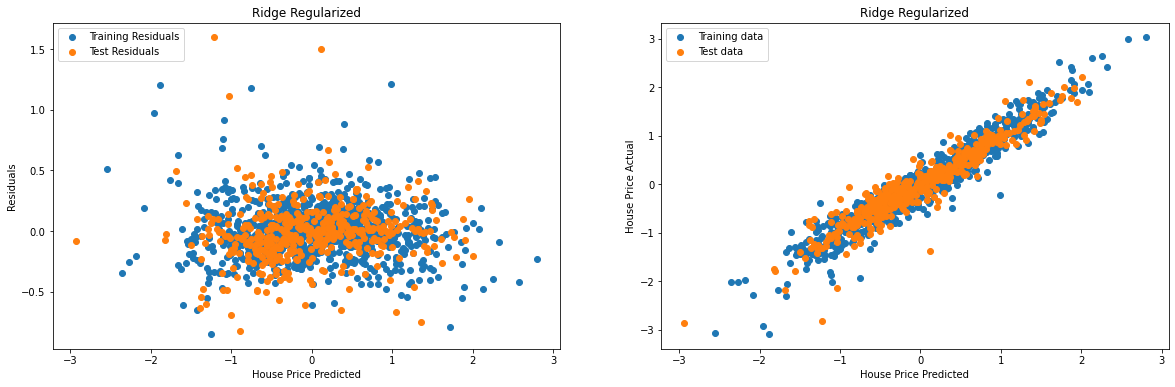

In [63]:
# Residuals Plot
plt.figure(figsize = (20,6))
plt.subplot(121)
plt.scatter(house_train_rid_pred, house_train_rid_pred - housing_y_train,  label = "Training Residuals")
plt.scatter(house_test_rid_pred, house_test_rid_pred - housing_y_test,  label = "Test Residuals")
plt.title("Ridge Regularized")
plt.xlabel("House Price Predicted")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")

# Predictions Plot
plt.subplot(122)
plt.scatter(house_train_rid_pred, housing_y_train, label = "Training data")
plt.scatter(house_test_rid_pred, housing_y_test, label = "Test data")
plt.title("Ridge Regularized")
plt.xlabel("House Price Predicted")
plt.ylabel("House Price Actual")
plt.legend(loc = "upper left")

plt.show()

There are no patterns in the residuals and also the train and test datasets are overlapping well

In [64]:
 pd.Series(house_rid.coef_, index = housing_X_train[col_rfe].columns).sort_values()

MSSubClass_MSC160       -0.285625
HouseAge                -0.281648
Exterior1st_BrkComm     -0.212931
KitchenAbvGr            -0.201004
Heating_Grav            -0.200273
Foundation_Wood         -0.169510
BsmtUnfSF               -0.124178
Condition2_Norm         -0.089638
Exterior2nd_Stucco      -0.084234
LotConfig_FR3           -0.052553
BldgType_Duplex         -0.039198
MSSubClass_MSC40        -0.038798
Condition2_Feedr        -0.037676
Exterior1st_AsphShn     -0.027275
Exterior2nd_AsphShn     -0.027275
Exterior2nd_CBlock      -0.021242
Exterior1st_CBlock      -0.021242
MSSubClass_MSC45         0.000704
SaleCondition_Partial    0.025181
Condition2_RRNn          0.025246
Utilities                0.031745
RoofStyle_Shed           0.053050
MSZoning_RM              0.059770
Condition1_RRNn          0.075293
SaleCondition_Alloca     0.076291
SaleType_Con             0.090184
MSZoning_RH              0.092089
Condition1_Norm          0.095677
Exterior1st_Stucco       0.096364
SaleCondition_

##### The top 5 positively related coefficients are

             GrLivArea :  0.4419
            MSZoning_FV:  0.2971
            OverallQual:  0.2521
    Neighborhood_Crawfor: 0.2519
            SaleType_New: 0.2497

##### The top 5 negatively related coefficients are 

    MSSubClass_MSC160:  -0.2856
             HouseAge:  -0.2816
    Exterior1st_BrkComm:-0.2129
         KitchenAbvGr:  -0.2010
         Heating_Grav:  -0.2003

#### Lasso Regression

In [65]:
house_las = LassoCV(alphas = lasAlpha)
house_las.fit(housing_X_train[col_rfe],housing_y_train)

base_las_alpha = house_las.alpha_
# Predict RMSE and MAE on train and test data sets

# RMSE
print("RMSE on House Prices - Training Data : ", neg_rmse_train(house_las,housing_X_train[col_rfe],housing_y_train).mean())
print("RMSE on House Prices - Test     Data : ", neg_rmse_test(house_las,housing_X_test[col_rfe],housing_y_test).mean())
print('\n')
#MAE
print("MAE on House Prices  - Training Data  : ", neg_mae_train(house_las,housing_X_train[col_rfe],housing_y_train).mean())
print("MAE on House Prices  - Test     Data  : ", neg_mae_test(house_las,housing_X_test[col_rfe],housing_y_test).mean())

print('\n')

print('Optimal Lasso Alpha :' ,base_las_alpha)

RMSE on House Prices - Training Data :  0.23524898011516768
RMSE on House Prices - Test     Data :  0.27517994598816664


MAE on House Prices  - Training Data  :  0.17021715795706543
MAE on House Prices  - Test     Data  :  0.18455796269173258


Optimal Lasso Alpha : 0.001


In [66]:
house_train_las_pred = house_las.predict(housing_X_train[col_rfe])
house_test_las_pred = house_las.predict(housing_X_test[col_rfe])

print('Training R2 Score  : ', r2_score(housing_y_train,house_train_las_pred))
print('Test R2 Score      : ', r2_score(housing_y_test,house_test_las_pred))

Training R2 Score  :  0.9218991081413195
Test R2 Score      :  0.8952505240286368


In [67]:
house_las.coef_

array([ 0.        ,  0.26517453,  0.10846045, -0.12387651,  0.22180827,
        0.44114473, -0.20375815,  0.12616988, -0.27848356, -0.27739847,
       -0.        ,  0.        ,  0.22281545,  0.        ,  0.11633511,
       -0.        , -0.        ,  0.17740705,  0.23650305,  0.14367877,
        0.13976117,  0.14695226,  0.08438899,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.05906008,
        0.        ,  0.00956872, -0.        , -0.0146609 ,  0.11346325,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.00101675, -0.12223815,  0.        ,  0.        ,  0.26046217,
        0.        ,  0.        ,  0.        ,  0.13524863,  0.        ])

- From the above data, we see consistent results between train and test data, hence less variance is observerd
- There are many variables that have been reduced to zero,indirectly eliminating more features

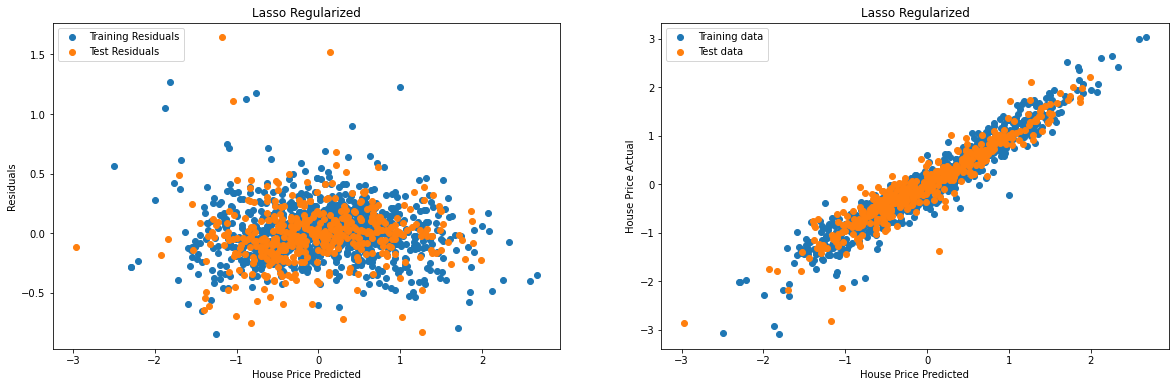

In [68]:
# Plot residuals
plt.figure(figsize = (20,6))
plt.subplot(121)
plt.scatter(house_train_las_pred, house_train_las_pred - housing_y_train,  label = "Training Residuals")
plt.scatter(house_test_las_pred, house_test_las_pred - housing_y_test, label = "Test Residuals")
plt.title("Lasso Regularized")
plt.xlabel("House Price Predicted")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")

# Plot predictions
plt.subplot(122)
plt.scatter(house_train_las_pred, housing_y_train,  label = "Training data")
plt.scatter(house_test_las_pred, housing_y_test,  label = "Test data")
plt.title("Lasso Regularized")
plt.xlabel("House Price Predicted")
plt.ylabel("House Price Actual")
plt.legend(loc = "upper left")

plt.show()

There are no patterns in the residuals and also the train and test datasets are overlapping well

In [69]:
 pd.Series(house_rid.coef_, index = housing_X_train[col_rfe].columns).sort_values()

MSSubClass_MSC160       -0.285625
HouseAge                -0.281648
Exterior1st_BrkComm     -0.212931
KitchenAbvGr            -0.201004
Heating_Grav            -0.200273
Foundation_Wood         -0.169510
BsmtUnfSF               -0.124178
Condition2_Norm         -0.089638
Exterior2nd_Stucco      -0.084234
LotConfig_FR3           -0.052553
BldgType_Duplex         -0.039198
MSSubClass_MSC40        -0.038798
Condition2_Feedr        -0.037676
Exterior1st_AsphShn     -0.027275
Exterior2nd_AsphShn     -0.027275
Exterior2nd_CBlock      -0.021242
Exterior1st_CBlock      -0.021242
MSSubClass_MSC45         0.000704
SaleCondition_Partial    0.025181
Condition2_RRNn          0.025246
Utilities                0.031745
RoofStyle_Shed           0.053050
MSZoning_RM              0.059770
Condition1_RRNn          0.075293
SaleCondition_Alloca     0.076291
SaleType_Con             0.090184
MSZoning_RH              0.092089
Condition1_Norm          0.095677
Exterior1st_Stucco       0.096364
SaleCondition_

##### The top 5 positively related coefficients are

             GrLivArea :  0.4419
            MSZoning_FV:  0.2971
            OverallQual:  0.2521
    Neighborhood_Crawfor: 0.2519
            SaleType_New: 0.2497

##### The top 5 negatively related coefficients are 

    MSSubClass_MSC160:  -0.2856
             HouseAge:  -0.2816
    Exterior1st_BrkComm:-0.2129
         KitchenAbvGr:  -0.2010
         Heating_Grav:  -0.2003

### Inference

 - We can clearly see that both Ridge and Lasso gives us the same list of variables which are significant in predicting the SalePrice
 - While Ridge keeps all the variables, the Lasso regression helps us eliminate less significant variables and makes the model more simple and easy to explain
 - The below are the significant variables in predicting the house price

#### Varables with Positive effect on housing price

GrLivArea  -  Living Area

MSZoning_FV -  Floating Village Residential under zoning classification of the sale

OverallQual - The overall material and finish of the house

Neighborhood_Crawfor - Crawford

SaleType_New - Type of sale New

#### Varables with Negative effect on housing price

MSSubClass_MSC160 -  2-STORY PUD - 1946 & NEWER

HouseAge

Exterior1st_BrkComm - Exterior covering on house Brick Face

KitchenAbvGr -  Kitchens above grade

Heating_Grav:  Heating Gravity furnace


##### The optimal value of Alpha is 3 for Ridge and 0.001 for Lasso regression

### -------------------------------------------------------------------------------------------------------------------------------------------------

### Code Analysis for Subjective Questions

1: What happens when we double the value of alpha for Ridge and Lasso?

Solution - Doubling the value of alpha for both Ridge and Lasso

- Ridge Regression

In [70]:
ridge_double = Ridge(alpha = 6)
ridge_double.fit(housing_X_train[col_rfe],housing_y_train)

# Predict RMSE and MAE on train and test data sets
# RMSE
print("RMSE on House Prices - Training Data : ", neg_rmse_train(ridge_double,housing_X_train[col_rfe],housing_y_train).mean())
print("RMSE on House Prices - Test     Data : ", neg_rmse_test(ridge_double,housing_X_test[col_rfe],housing_y_test).mean())
print('\n')
#MAE
print("MAE on House Prices  - Training Data  : ", neg_mae_train(ridge_double,housing_X_train[col_rfe],housing_y_train).mean())
print("MAE on House Prices  - Test     Data  : ", neg_mae_test(ridge_double,housing_X_test[col_rfe],housing_y_test).mean())


RMSE on House Prices - Training Data :  0.233017004658022
RMSE on House Prices - Test     Data :  0.26386005663056233


MAE on House Prices  - Training Data  :  0.1689191562648174
MAE on House Prices  - Test     Data  :  0.1781338666046799


In [71]:
house_train_rid_pred_double = ridge_double.predict(housing_X_train[col_rfe])
house_test_rid_pred_double = ridge_double.predict(housing_X_test[col_rfe])

print('Training R2 Score  : ',r2_score(housing_y_train,house_train_rid_pred_double))
print('Test R2 Score  : ',r2_score(housing_y_test,house_test_rid_pred_double))

Training R2 Score  :  0.9236669397705627
Test R2 Score  :  0.8966644637685215


In [72]:
 pd.Series(ridge_double.coef_, index = housing_X_train[col_rfe].columns).sort_values()

HouseAge                -0.276573
MSSubClass_MSC160       -0.256341
KitchenAbvGr            -0.174640
Heating_Grav            -0.146491
Exterior1st_BrkComm     -0.132338
BsmtUnfSF               -0.123820
Foundation_Wood         -0.113123
Condition2_Norm         -0.062079
Exterior2nd_Stucco      -0.051126
BldgType_Duplex         -0.049889
LotConfig_FR3           -0.029975
Condition2_Feedr        -0.020707
MSSubClass_MSC40        -0.020401
Exterior2nd_AsphShn     -0.017268
Exterior1st_AsphShn     -0.017268
Exterior2nd_CBlock      -0.013139
Exterior1st_CBlock      -0.013139
MSZoning_RM             -0.001924
Condition2_RRNn          0.018079
MSSubClass_MSC45         0.020607
Utilities                0.024338
RoofStyle_Shed           0.029749
MSZoning_RH              0.040241
Condition1_RRNn          0.048609
SaleCondition_Alloca     0.051205
SaleType_Con             0.058878
Condition2_PosA          0.061030
Exterior1st_Stucco       0.061729
SaleCondition_AdjLand    0.062525
SaleType_Oth  

#### The features remain the same but the coefficient values reduces when we double the alpha values

- Lasso Regression

In [73]:
las_double = Lasso(alpha = 0.002)
las_double.fit(housing_X_train[col_rfe],housing_y_train)

# Predict RMSE and MAE on train and test data sets

# RMSE
print("RMSE on House Prices - Training Data : ", neg_rmse_train(las_double,housing_X_train[col_rfe],housing_y_train).mean())
print("RMSE on House Prices - Test     Data : ", neg_rmse_test(las_double,housing_X_test[col_rfe],housing_y_test).mean())
print('\n')
#MAE
print("MAE on House Prices  - Training Data  : ", neg_mae_train(las_double,housing_X_train[col_rfe],housing_y_train).mean())
print("MAE on House Prices  - Test     Data  : ", neg_mae_test(las_double,housing_X_test[col_rfe],housing_y_test).mean())

RMSE on House Prices - Training Data :  0.23679182060088796
RMSE on House Prices - Test     Data :  0.2656811638671113


MAE on House Prices  - Training Data  :  0.17274337400099998
MAE on House Prices  - Test     Data  :  0.1795157505446755


In [74]:
train_las_pred_double = las_double.predict(housing_X_train[col_rfe])
test_las_pred_double = las_double.predict(housing_X_test[col_rfe])

print('Training R2 Score (Lasso) : ', r2_score(housing_y_train,train_las_pred_double))
print('Test R2 Score (Lasso) : ', r2_score(housing_y_test,test_las_pred_double))

Training R2 Score (Lasso) :  0.9187371510176587
Test R2 Score (Lasso) :  0.8941093966064467


In [75]:
 pd.Series(las_double.coef_, index = housing_X_train[col_rfe].columns).sort_values()

HouseAge                -0.276265
MSSubClass_MSC160       -0.233695
KitchenAbvGr            -0.179208
BsmtUnfSF               -0.123601
MSZoning_RM             -0.021644
Utilities                0.000000
BldgType_Duplex         -0.000000
HouseStyle_1.5Unf        0.000000
RoofStyle_Shed           0.000000
RoofMatl_WdShngl         0.000000
Exterior1st_AsphShn     -0.000000
Exterior1st_BrkComm     -0.000000
Exterior1st_CBlock      -0.000000
Exterior1st_Stucco       0.000000
Exterior2nd_Stucco      -0.000000
Exterior2nd_CBlock      -0.000000
Condition2_RRNn          0.000000
Foundation_Wood         -0.000000
Heating_Grav            -0.000000
SaleType_Con             0.000000
SaleType_ConLD           0.000000
SaleType_Oth             0.000000
SaleCondition_AdjLand    0.000000
SaleCondition_Alloca     0.000000
Exterior2nd_AsphShn     -0.000000
Condition2_PosA          0.000000
Condition2_Feedr         0.000000
MSZoning_RH              0.000000
MSSubClass_MSC40        -0.000000
MSSubClass_MSC

#### In Lasso , the coefficient values are getting reduced but many other variables are reduced to 0 (or eliminated)

2. Finding the five important predictor after removing the previous 5 importatnt predictors

In [76]:
#Our current top 5 features are given below
top5_col = ['GrLivArea', 'MSZoning_FV', 'MSSubClass_MSC160', 'HouseAge', 'OverallQual']

In [77]:
#Creating new column list without the top 5 features
col_rfe_new = col_rfe[~col_rfe.isin(top5_col)]

In [78]:
housing_X_train_new = housing_X_train.drop(top5_col,axis=1)
housing_X_test_new = housing_X_test.drop(top5_col,axis=1)

In [79]:
housing_rfe_new = RFE(house_lm,50)
housing_rfe_new.fit(housing_X_train_new,housing_y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [80]:
cols_X_new = housing_X_train_new.columns

In [81]:
rfe_cols_new = cols_X_new[housing_rfe_new.support_]

In [82]:
house_las_new = LassoCV(alphas = lasAlpha)
house_las_new.fit(housing_X_train_new[rfe_cols_new],housing_y_train)

house_las_new_alpha = house_las_new.alpha_
# Predict RMSE and MAE on train and test data sets

# RMSE
print("RMSE on House Prices - Training Data : ", neg_rmse_train(house_las_new,housing_X_train_new[rfe_cols_new],housing_y_train).mean())
print("RMSE on House Prices - Test     Data : ", neg_rmse_test(house_las_new,housing_X_test_new[rfe_cols_new],housing_y_test).mean())
print('\n')
#MAE
print("MAE on House Prices  - Training Data  : ", neg_mae_train(house_las_new,housing_X_train_new[rfe_cols_new],housing_y_train).mean())
print("MAE on House Prices  - Test     Data  : ", neg_mae_test(house_las_new,housing_X_test_new[rfe_cols_new],housing_y_test).mean())
print('\n')
print('Optimal Lasso Alpha :' ,house_las_new_alpha)

RMSE on House Prices - Training Data :  0.31254056668137153
RMSE on House Prices - Test     Data :  0.346047799219337


MAE on House Prices  - Training Data  :  0.22722606052792355
MAE on House Prices  - Test     Data  :  0.2547606726040278


Optimal Lasso Alpha : 0.0006


In [83]:
house_las_new_train_las_pred = house_las_new.predict(housing_X_train_new[rfe_cols_new])
house_las_new_test_las_pred = house_las_new.predict(housing_X_test_new[rfe_cols_new])

print('Training R2 Score : ', r2_score(housing_y_train,house_las_new_train_las_pred))
print('Test R2 Score : ', r2_score(housing_y_test,house_las_new_test_las_pred))

Training R2 Score :  0.8731231802125252
Test R2 Score :  0.826475222715689


In [84]:
 pd.Series(house_las_new.coef_, index = housing_X_train[rfe_cols_new].columns).sort_values()

Exterior1st_BrkComm     -0.476685
Neighborhood_MeadowV    -0.281102
KitchenAbvGr            -0.238687
GarageType_NO           -0.217106
Heating_Grav            -0.162771
MSSubClass_MSC180       -0.089626
Street                   0.000000
SaleType_Oth             0.000000
SaleType_Con             0.000000
Exterior2nd_CBlock      -0.000000
Exterior2nd_AsphShn      0.000000
Exterior1st_CBlock      -0.000000
Exterior1st_AsphShn      0.000000
RoofMatl_Membran         0.000000
RoofStyle_Shed           0.000000
Condition2_PosA          0.000000
SaleCondition_Partial   -0.000000
MSSubClass_MSC190        0.000000
Neighborhood_Blueste     0.000000
MSSubClass_MSC45        -0.000000
BldgType_Duplex          0.066589
SaleType_ConLD           0.085663
HouseStyle_1.5Unf        0.101935
Electrical_FuseP         0.105541
BldgType_2fmCon          0.115675
RoofMatl_WdShngl         0.117032
MSSubClass_MSC90         0.145015
BldgType_TwnhsE          0.211858
SaleCondition_Normal     0.215848
Neighborhood_C

##### The new significant features are
    MSSubClass_MSC60 : Type of dwelling involved in the sale - 2-STORY 1946 & NEWER
    2ndFlrSF : Second floor square feet
    Exterior1st_BrkComm : Exterior covering on house - Brick Common
    1stFlrSF : First Floor square feet
    Neighborhood_Crawfor : Crawford